In [1]:
import glob
import numpy as np 
from sklearn.decomposition import PCA

In [ ]:
#load all data into 17 by 1200*6000 vector 
#PCA fit this without time, and save the object
#plot variance explained versus number of features
#select the smallest # of features before elbow
#transform all of the samples and resave 

In [2]:
# get files 
A = glob.glob('data/data/Stimulus_A/LFP_15_300/*.csv')
B = glob.glob('data/data/Stimulus_B/LFP_15_300/*.csv')
files = list(A) + list(B)
len(files)

1200

In [3]:
alldata = []
counter = 1
for f in files: 
    print('Loading file ' + str(counter) + ' of 1200')
    n1 = np.genfromtxt(f, delimiter=',')
    alldata.append(n1)
    counter += 1

Loading file 1 of 1200
Loading file 2 of 1200
Loading file 3 of 1200
Loading file 4 of 1200
Loading file 5 of 1200
Loading file 6 of 1200
Loading file 7 of 1200
Loading file 8 of 1200
Loading file 9 of 1200
Loading file 10 of 1200
Loading file 11 of 1200
Loading file 12 of 1200
Loading file 13 of 1200
Loading file 14 of 1200
Loading file 15 of 1200
Loading file 16 of 1200
Loading file 17 of 1200
Loading file 18 of 1200
Loading file 19 of 1200
Loading file 20 of 1200
Loading file 21 of 1200
Loading file 22 of 1200
Loading file 23 of 1200
Loading file 24 of 1200
Loading file 25 of 1200
Loading file 26 of 1200
Loading file 27 of 1200
Loading file 28 of 1200
Loading file 29 of 1200
Loading file 30 of 1200
Loading file 31 of 1200
Loading file 32 of 1200
Loading file 33 of 1200
Loading file 34 of 1200
Loading file 35 of 1200
Loading file 36 of 1200
Loading file 37 of 1200
Loading file 38 of 1200
Loading file 39 of 1200
Loading file 40 of 1200
Loading file 41 of 1200
Loading file 42 of 1200
L

Loading file 334 of 1200
Loading file 335 of 1200
Loading file 336 of 1200
Loading file 337 of 1200
Loading file 338 of 1200
Loading file 339 of 1200
Loading file 340 of 1200
Loading file 341 of 1200
Loading file 342 of 1200
Loading file 343 of 1200
Loading file 344 of 1200
Loading file 345 of 1200
Loading file 346 of 1200
Loading file 347 of 1200
Loading file 348 of 1200
Loading file 349 of 1200
Loading file 350 of 1200
Loading file 351 of 1200
Loading file 352 of 1200
Loading file 353 of 1200
Loading file 354 of 1200
Loading file 355 of 1200
Loading file 356 of 1200
Loading file 357 of 1200
Loading file 358 of 1200
Loading file 359 of 1200
Loading file 360 of 1200
Loading file 361 of 1200
Loading file 362 of 1200
Loading file 363 of 1200
Loading file 364 of 1200
Loading file 365 of 1200
Loading file 366 of 1200
Loading file 367 of 1200
Loading file 368 of 1200
Loading file 369 of 1200
Loading file 370 of 1200
Loading file 371 of 1200
Loading file 372 of 1200
Loading file 373 of 1200


Loading file 663 of 1200
Loading file 664 of 1200
Loading file 665 of 1200
Loading file 666 of 1200
Loading file 667 of 1200
Loading file 668 of 1200
Loading file 669 of 1200
Loading file 670 of 1200
Loading file 671 of 1200
Loading file 672 of 1200
Loading file 673 of 1200
Loading file 674 of 1200
Loading file 675 of 1200
Loading file 676 of 1200
Loading file 677 of 1200
Loading file 678 of 1200
Loading file 679 of 1200
Loading file 680 of 1200
Loading file 681 of 1200
Loading file 682 of 1200
Loading file 683 of 1200
Loading file 684 of 1200
Loading file 685 of 1200
Loading file 686 of 1200
Loading file 687 of 1200
Loading file 688 of 1200
Loading file 689 of 1200
Loading file 690 of 1200
Loading file 691 of 1200
Loading file 692 of 1200
Loading file 693 of 1200
Loading file 694 of 1200
Loading file 695 of 1200
Loading file 696 of 1200
Loading file 697 of 1200
Loading file 698 of 1200
Loading file 699 of 1200
Loading file 700 of 1200
Loading file 701 of 1200
Loading file 702 of 1200


Loading file 992 of 1200
Loading file 993 of 1200
Loading file 994 of 1200
Loading file 995 of 1200
Loading file 996 of 1200
Loading file 997 of 1200
Loading file 998 of 1200
Loading file 999 of 1200
Loading file 1000 of 1200
Loading file 1001 of 1200
Loading file 1002 of 1200
Loading file 1003 of 1200
Loading file 1004 of 1200
Loading file 1005 of 1200
Loading file 1006 of 1200
Loading file 1007 of 1200
Loading file 1008 of 1200
Loading file 1009 of 1200
Loading file 1010 of 1200
Loading file 1011 of 1200
Loading file 1012 of 1200
Loading file 1013 of 1200
Loading file 1014 of 1200
Loading file 1015 of 1200
Loading file 1016 of 1200
Loading file 1017 of 1200
Loading file 1018 of 1200
Loading file 1019 of 1200
Loading file 1020 of 1200
Loading file 1021 of 1200
Loading file 1022 of 1200
Loading file 1023 of 1200
Loading file 1024 of 1200
Loading file 1025 of 1200
Loading file 1026 of 1200
Loading file 1027 of 1200
Loading file 1028 of 1200
Loading file 1029 of 1200
Loading file 1030 of

In [4]:
np.array(alldata).shape

(1200, 17, 6000)

In [7]:
alldata_reshaped = np.hstack(alldata)
alldata_reshaped.shape

(17, 7200000)

In [11]:
alldata_reshaped = alldata_reshaped.T
alldata_not = alldata_reshaped[:, 0:16] #without time
alldata_not.shape

(7200000, 16)

In [12]:
#try features from 1 to 16 - number of channels
var_exp = []
for i in range(1,17): 
    pca = PCA(n_components=i)
    pca.fit(alldata_not)
    var_exp.append(sum(pca.explained_variance_))

In [13]:
var_exp

[8.753282906633433e-05,
 0.00013989268718524097,
 0.00016664327664059778,
 0.0001795017320581368,
 0.00018610383297115247,
 0.00019154165471716822,
 0.0001957351427217706,
 0.0001989065862184826,
 0.0002016637715557853,
 0.0002039881094519827,
 0.00020560425785436312,
 0.00020681533614219506,
 0.0002079080105554661,
 0.00020881465384353835,
 0.0002095961167553191,
 0.00020961912983537056]

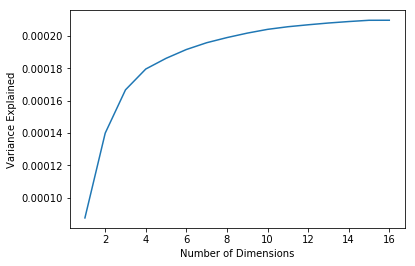

In [15]:
import matplotlib.pyplot as plt 

plt.plot(range(1,17), var_exp) 
plt.xlabel('Number of Dimensions')
plt.ylabel('Variance Explained')
plt.show()

In [16]:
#update after inspection of plot
ndim = 5

In [18]:
#this is the model we want to reuse
pca = PCA(n_components = ndim)
pca.fit(alldata_not)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
#transform each file, and save it 
i = 0
for f in files: 
    print('Transforming File ' + str(i+1) + ' of ' + str(len(files)))
    n = np.genfromtxt(f, delimiter = ',')
    n1 = n.T[:, 0:16]
    t = n.T[:, 16]
    t = np.reshape(t, (6000, 1))
    n2 = pca.transform(n1)
    print(n2.shape)
    n3 = np.hstack((n2, t))
    print(n3.shape)
    break
    
    if 'A' in f: 
        stim = 'A'
    else: 
        stim = 'B'
        
    path = 'data/data/Stimulus_' + stim + '/LFP_15_300/PCA'
    filename = 'pca_stim_' + stim + '_' + str(i) + '.csv'
    np.savetxt(path + '/' + filename, n3.T, delimiter=',')
    
    i+=1

Transforming File 1 of 1200
(6000, 5)
(6000, 6)
